In [14]:
!pip install transformers -q

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import pipeline, BlipProcessor, BlipForConditionalGeneration
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

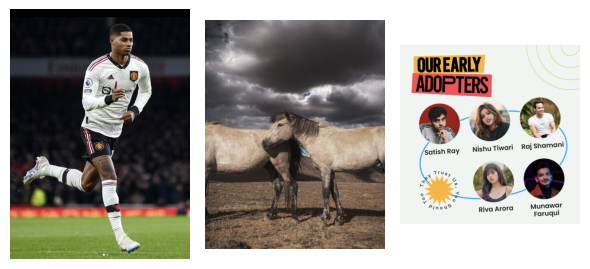

In [16]:
# Defining the path to the image files
img1_path = '/content/Image1.png'
img2_path = '/content/Image2.png'
img3_path = '/content/Image3.png'

# Loading the images
img1 = Image.open(img1_path)
img2 = Image.open(img2_path)
img3 = Image.open(img3_path)

# Let's display the images in a 10x10 size
fig, ax = plt.subplots(1,3,figsize=(6,5))
ax[0].imshow(img1)
ax[0].axis('off')

ax[1].imshow(img2)
ax[1].axis('off')

ax[2].imshow(img3)
ax[2].axis('off')

plt.tight_layout()
plt.show();

In [17]:
image_to_text = pipeline('image-to-text') #default model : https://huggingface.co/ydshieh/vit-gpt2-coco-en

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [18]:
smoothing = SmoothingFunction().method1  # Initializing smoothing for BLEU score

In [19]:
# Loop for generating captions for the images
for image in [img1,img2,img3]:
  generated_caption = image_to_text(image)[0]['generated_text']
  print("Generated Caption:", generated_caption)

  # Generation of reference captions
  reference_captions = []
  for _ in range(5):  # Generating 5 reference captions
    reference_caption = "Reference caption for image"
    reference_captions.append(reference_caption)

  # Calculating the BLEU score
  bleu_score = sentence_bleu(reference_captions, generated_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing)
  print("BLEU Score:", bleu_score)
  print()

Generated Caption: a man in a soccer uniform kicking a soccer ball 
BLEU Score: 0.26631182064565373

Generated Caption: a woman is standing in a field with a horse 
BLEU Score: 0.23891934294085448

Generated Caption: a collage of photos showing a woman holding a sign 
BLEU Score: 0.20579830217101064



In [20]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [21]:
for image in [img1_path,img2_path,img3_path]:
  image_path = image
  raw_image = Image.open(image_path).convert('RGB')

  # Conditional image captioning
  text = "an image of"
  inputs = processor(raw_image, text, return_tensors="pt")

  out = model.generate(**inputs)
  generated_caption = processor.decode(out[0], skip_special_tokens=True)
  print("Generated Caption:", generated_caption)

  # Generation of reference captions
  reference_captions = []
  for _ in range(5):  # Generating 5 reference captions
    reference_caption = "Reference caption for image"
    reference_captions.append(reference_caption)

  # Calculating the BLEU score
  bleu_score = sentence_bleu(reference_captions, generated_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing)
  print("BLEU Score:", bleu_score)
  print()

  # Unconditional image captioning
  inputs = processor(raw_image, return_tensors="pt")

  out = model.generate(**inputs)
  generated_caption = processor.decode(out[0], skip_special_tokens=True)
  print("Generated Caption:", generated_caption)

  # Calculating the BLEU score
  bleu_score = sentence_bleu(reference_captions, generated_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing)
  print("BLEU Score:", bleu_score)
  print()

Generated Caption: an image of a soccer player running on the field
BLEU Score: 0.371884218998905

Generated Caption: a man running on a soccer field
BLEU Score: 0.38799179683158525

Generated Caption: an image of two horses standing in a field
BLEU Score: 0.32331040305678177

Generated Caption: two horses standing in a field under a cloudy sky
BLEU Score: 0.24397501823713333

Generated Caption: an image of a group of people with the words'oraly adpers '
BLEU Score: 0.24594906173879355

Generated Caption: a poster with the names of the different actors
BLEU Score: 0.2787576509032448



In [22]:
processor2 = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model2 = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

In [23]:
for image in [img1_path,img2_path,img3_path]:
  image_path = image
  raw_image = Image.open(image_path).convert('RGB')

  # Conditional image captioning
  text = "an image of"
  inputs = processor2(raw_image, text, return_tensors="pt")

  out = model2.generate(**inputs)
  generated_caption = processor2.decode(out[0], skip_special_tokens=True)
  print("Generated Caption:", generated_caption)

  # Generation of reference captions
  reference_captions = []
  for _ in range(5):  # Generating 5 reference captions
    reference_caption = "Reference caption for image"
    reference_captions.append(reference_caption)

  # Calculating the BLEU score
  bleu_score = sentence_bleu(reference_captions, generated_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing)
  print("BLEU Score:", bleu_score)
  print()

  # Unconditional image captioning
  inputs = processor2(raw_image, return_tensors="pt")

  out = model2.generate(**inputs)
  generated_caption = processor2.decode(out[0], skip_special_tokens=True)
  print("Generated Caption:", generated_caption)

  # Calculating the BLEU score
  bleu_score = sentence_bleu(reference_captions, generated_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing)
  print("BLEU Score:", bleu_score)
  print()

Generated Caption: an image of a man running on a soccer field with a ball
BLEU Score: 0.30484306278689194

Generated Caption: arafed soccer player running on a soccer field with a ball
BLEU Score: 0.2300740300123993

Generated Caption: an image of two horses standing in a field with a cloudy sky
BLEU Score: 0.24356115022372735

Generated Caption: there are two horses standing together in a field under a cloudy sky
BLEU Score: 0.21974524319124628

Generated Caption: an image of a poster with a group of people on it
BLEU Score: 0.31271251277532613

Generated Caption: a close up of a poster with a bunch of people
BLEU Score: 0.22473328748774735

